# Busness Case :

### Predict Purchasing power or Capacity of the customers

Final Analysis Goal
We can predict a customer’s purchasing power based on demographics, spending behavior, and transaction history using Regression or Classification models 

Problem Type:
🔹 Regression Problem → If we predict the exact purchasing power (continuous variable like "Total Spent" or "Amount").

# Domain Analysis

This is a Supervised Learning problem because we have labeled data (Total Spent or Amount as the target variable) 

Feature Relevance for Purchasing Power Analysis
Demographics (Who is spending?)

Age, Age Group, Gender, Marital_Status
Occupation, Income, Location, State, Zone
Spending Behavior (How much they spend?)

Total Spent, Amount, Orders
Category(products), Item, Product_Category
Transaction Details (How they spend?)

Payment Method
Transaction Date (Seasonal trends)

Customer Engagement (What affects spending?)

Quantity, Price Per Unit
Status (if it represents active/inactive buyers)


In [1]:

## IMPORT LIABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset

file_name = "Customer_purchasing - Copy.csv"  # File in the same folder

df = pd.read_csv(file_name, encoding="ISO-8859-1")  # Try ISO-8859-1
# Alternative encodings: "latin1" or "cp1252"

print(df.head())

   User_ID  Cust_name               Category                 Item  \
0  1002903  Sanskriti              Groceries                 Milk   
1  1000732     Kartik      Friend Activities  Dinner with Friends   
2  1001990      Bindu  Housing and Utilities           Water Bill   
3  1001425     Sudevi                Fitness           Yoga Class   
4  1000588       Joni                  Gifts              Flowers   

   Price Per Unit  Quantity  Total Spent Gender Age Group  Age  ...  \
0            1.28       1.0         1.28      F     26-35   28  ...   
1           74.69       2.0       149.39      F     26-35   35  ...   
2           76.06       1.0        76.06      F     26-35   35  ...   
3           11.24       5.0        56.18      M      0-17   16  ...   
4           43.71       3.0       131.12      M     26-35   28  ...   

        Occupation    Income    Location Product_Category Orders   Amount  \
0       Healthcare    3-8LAC  Mobile App             Auto      1  23952.0   
1   

In [3]:
## UNDERSTANDING DATASET
#### WITH BASIC CHEKINGS

In [4]:
df.head(2)

,User_ID,Cust_name,Category,Item,Price Per Unit,Quantity,Total Spent,Gender,Age Group,Age,...,Occupation,Income,Location,Product_Category,Orders,Amount,Transaction Date,Payment Method,Status,unnamed1
0,1002903,Sanskriti,Groceries,Milk,1.28,1.0,1.28,F,26-35,28,...,Healthcare,3-8LAC,Mobile App,Auto,1,23952.0,11/13/2024,Debit Card,NaN,NaN
1,1000732,Kartik,Friend Activities,Dinner with Friends,74.69,2.0,149.39,F,26-35,35,...,Govt,2.5-6LAC,In-store,Auto,3,23934.0,5/4/2023,Debit Card,NaN,NaN


In [5]:
df.tail(2)

,User_ID,Cust_name,Category,Item,Price Per Unit,Quantity,Total Spent,Gender,Age Group,Age,...,Occupation,Income,Location,Product_Category,Orders,Amount,Transaction Date,Payment Method,Status,unnamed1
11249,1004023,Noonan,Other,Other,NaN,1.0,NaN,M,36-45,37,...,Agriculture,1.5-10LAC,In-store,Office,3,206.0,NaN,Cash,NaN,NaN
11250,1002744,Brumley,Other,Other,NaN,NaN,NaN,F,18-25,19,...,Healthcare,3-8LAC,NaN,Office,3,188.0,NaN,NaN,NaN,NaN


In [7]:
# dataframe of dataset r/c

df.shape

(11251, 23)

In [10]:
df.ndim

2

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Category          11251 non-null  object 
 3   Item              11251 non-null  object 
 4   Price Per Unit    10000 non-null  float64
 5   Quantity          10304 non-null  float64
 6   Total Spent       10000 non-null  float64
 7   Gender            11251 non-null  object 
 8   Age Group         11251 non-null  object 
 9   Age               11251 non-null  int64  
 10  Marital_Status    11251 non-null  int64  
 11  State             11251 non-null  object 
 12  Zone              11251 non-null  object 
 13  Occupation        11251 non-null  object 
 14  Income            11251 non-null  object 
 15  Location          10307 non-null  object 
 16  Product_Category  11251 non-null  object

In [20]:
# total 11251 rows and 23 features are there, 
# null value in status and unnamed1 , 
# columns dtypes float(6), int(4), object(13)
# Many currupted and blanck data is there

In [23]:
### Statistical Distribution of Dataframe
df.describe()

,User_ID,Price Per Unit,Quantity,Total Spent,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,10000.000000,10304.000000,10000.000000,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,969.957948,2.200699,2534.750890,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,6104.403843,1.474062,19676.741772,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,1.000000,1.000000,1.110000,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,12.960000,1.000000,25.957500,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,51.860000,1.000000,88.115000,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,177.587500,3.000000,336.375000,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,74246.460000,5.000000,352230.760000,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [26]:
# status and unnamed1 are totally empty columns 
# marital status 0 values means corrupted data are there
# Many currupted and blanck data is there

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Income', 'Location',
       'Product_Category', 'Orders', 'Amount', 'Transaction Date',
       'Payment Method', 'Status', 'unnamed1'],
      dtype='object')

## MISSING VALUES cheking

In [33]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Category                0
Item                    0
Price Per Unit       1251
Quantity              947
Total Spent          1251
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Income                  0
Location              944
Product_Category        0
Orders                  0
Amount                 12
Transaction Date     1011
Payment Method       1007
Status              11251
unnamed1            11251
dtype: int64

In [35]:
#  in 11 features null values are there 

In [37]:
print("\nMissing data percentage (%):")
print(df.isnull().sum()/df.count()*100)          # kitni missing value hai %  total me se


Missing data percentage (%):
User_ID              0.000000
Cust_name            0.000000
Category             0.000000
Item                 0.000000
Price Per Unit      12.510000
Quantity             9.190606
Total Spent         12.510000
Gender               0.000000
Age Group            0.000000
Age                  0.000000
Marital_Status       0.000000
State                0.000000
Zone                 0.000000
Occupation           0.000000
Income               0.000000
Location             9.158824
Product_Category     0.000000
Orders               0.000000
Amount               0.106771
Transaction Date     9.873047
Payment Method       9.830144
Status                    inf
unnamed1                  inf
dtype: float64


In [39]:
# % OF MISSING VALUES DATA IS HIGH THATS WHY IMPUTING MISSING VALUES ARE PREFERED with mean and mode ( cat_features)

In [41]:
## DUPLICATE AND CURRUPTED DATA CHEKING

In [42]:

# Product Categories are there (13)
df["Category"].unique() 
   

array(['Groceries', 'Friend Activities', 'Housing and Utilities',
       'Fitness', 'Gifts', 'Transportation', 'Travel', 'Personal Hygiene',
       'Hobbies', 'Shopping', 'Medical/Dental', 'Food', 'Subscriptions',
       'Other'], dtype=object)

In [43]:
# 48 products are given in a list 

df["Item"].unique()  

array(['Milk', 'Dinner with Friends', 'Water Bill', 'Yoga Class',
       'Flowers', 'Car Repair', 'Personal Trainer', 'Plane Ticket',
       'Kids Games', 'Bread', 'Toothpaste', 'Crochet Supplies',
       'Gas Bill', 'Jewelry', 'Car', 'Shoes', 'Dentist Visit', 'Chicken',
       'Clothes', 'Snacks', 'Fast Food', 'Restaurant Meal', 'Taxi/Uber',
       'Doctor Visit', 'Public Transit', 'Medicine', 'Vegetables', 'Gas',
       'Streaming Service', 'Shampoo', 'Electricity Bill',
       'Skin Care Products', 'Coffee', 'Art Supplies', 'Magazine',
       'Movie Tickets', 'Workout Equipment', 'Meat', 'Rent',
       'Concert Tickets', 'Gift Cards', 'Hotel Stay', 'Soap', 'Books',
       'Electronics', 'Fruits', 'Gym Membership', 'Video Games', 'Other'],
      dtype=object)

In [44]:
# 1 to 5 quantity is given 
# and nan also there in this data

df["Quantity"].unique()  

array([ 1.,  2.,  5.,  3.,  4., nan])

In [45]:
# nan values are there in this columns 
# 7473 N of Unique values are there

df["Price Per Unit"].unique()  

array([  1.28,  74.69,  76.06, ..., 732.03, 107.63,    nan])

In [46]:
# nan values are there 

df["Total Spent"].unique() 


array([  1.28, 149.39,  76.06, ..., 107.63,  98.79,    nan])

In [47]:
# m/f   0/1 given int

df["Gender"].unique()    

array(['F', 'M'], dtype=object)

In [48]:
# 7 age groups are given
#(0-17 ,18-25, 26-35, 46-50,36-45,51-55)

df["Age Group"].unique() 

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [49]:
df["Age"].unique()  ##SEE min max

array([28, 35, 16, 25, 61, 26, 34, 20, 46, 24, 48, 29, 54, 19, 30, 53, 83,
       33, 40, 39, 32, 36, 55, 27, 72, 45, 43, 47, 22, 52, 18, 21, 38, 37,
       23, 49, 42, 50, 31, 44, 41, 66, 15, 51, 77, 87, 79, 71, 88, 58, 82,
       62, 92, 12, 63, 17, 13, 67, 90, 56, 75, 81, 64, 73, 84, 14, 76, 86,
       89, 68, 91, 85, 70, 80, 65, 74, 69, 78, 57, 60, 59], dtype=int64)

In [50]:
df["Marital_Status"].unique() 

array([0, 1], dtype=int64)

In [51]:
# 16 state is given from india
df["State"].unique() 


array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [52]:
df["Zone"].unique() 

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [53]:
# 15 types of Occupation given from various sectors
df["Occupation"].unique() 


array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'IT Sector', 'Media', 'Banking',
       'Retail', 'Hospitality', 'Aviation', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

In [54]:
# 31 income groups are given over all in dataset  caculate minnmax

df["Income"].unique() 


array(['3-8LAC', '2.5-6LAC', '3-13LAC', '2.5-5LAC', '3-6LAC', '12-40LAC',
       '2-6LAC', '1.5-10LAC', '6-15LAC', '6-10LAC', '6-8LAC', '15-18LAC',
       '5-12LAC', '8-18LAC', '5-8LAC', '6-18LAC', '8-15LAC', '8-30LAC',
       '8-20LAC', '5-15LAC', '15-25LAC', '10-15LAC', '18-25LAC',
       '8-12LAC', '20-40LAC', '15-20LAC', '15-40LAC', '15-30LAC',
       '12-23LAC', '30-40LAC', '25-50LAC'], dtype=object)

In [55]:
# purchasing  place list

df["Location"].unique() 

array(['Mobile App', 'In-store', 'Online', nan], dtype=object)

In [56]:
#  18 procust category is given (for uses and consuption luxury etc)
df["Product_Category"].unique() 

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [57]:
df["Orders"].unique() 

array([1, 3, 2, 4], dtype=int64)

In [58]:
# amount spend per proct vise    
# calculate mn max

df["Amount"].unique() 


array([23952., 23934., 23924., ...,   213.,   206.,   188.])

In [59]:
# transaction date and year given to see year on year purchasings 

df["Transaction Date"].unique() 

array(['11/13/2024', '5/4/2023', '12/16/2023', '1/28/2024', '7/28/2023',
       '7/14/2024', '3/8/2024', '1/14/2023', '8/15/2023', '10/15/2024',
       '12/31/2023', '5/12/2023', '12/15/2023', '1/6/2024', '11/24/2024',
       '12/29/2023', '11/27/2023', '11/29/2023', '8/15/2024', '1/21/2024',
       '11/6/2024', '7/26/2023', '4/14/2024', '9/6/2024', '4/18/2024',
       '6/28/2023', '3/16/2023', '6/5/2023', '6/13/2024', '7/3/2023',
       '5/16/2023', '1/7/2023', '5/25/2024', '7/21/2024', '9/30/2023',
       '8/2/2024', '8/9/2023', '9/29/2024', '1/5/2023', '12/6/2023',
       '3/25/2024', '3/3/2024', '1/11/2023', '9/6/2023', '5/10/2024',
       '11/29/2024', '4/1/2023', '2/20/2023', '1/26/2023', '11/5/2023',
       '4/19/2023', '4/8/2023', '5/31/2024', '9/19/2024', '1/17/2024',
       '8/1/2023', '9/22/2024', '6/24/2023', '12/13/2023', '7/7/2023',
       '2/3/2024', '1/25/2024', '7/11/2023', '4/22/2023', '8/23/2023',
       '7/4/2024', '3/16/2024', '11/20/2024', '9/26/2024', '5/23/2023'

In [60]:
# payment methods
# generally 4 method option is given in dataset

df["Payment Method"].unique() 

array(['Debit Card', 'Digital Wallet', 'Cash', 'Credit Card', nan],
      dtype=object)

In [61]:
df.dtypes

User_ID               int64
Cust_name            object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Income               object
Location             object
Product_Category     object
Orders                int64
Amount              float64
Transaction Date     object
Payment Method       object
Status              float64
unnamed1            float64
dtype: object

In [63]:
# checking for number of zeros
print(f"Number of zeros in Cust_name:- ",df[df["Cust_name"]==0].shape[0])
print(f"Number of zeros in Category:- ",df[df["Category"]==0].shape[0])
print(f"Number of zeros in Item:- ",df[df["Item"]==0].shape[0])
print(f"Number of zeros in Age Group:- ",df[df["Age Group"]==0].shape[0])
print(f"Number of zeros in Zone:- ",df[df["Zone"]==0].shape[0])
print(f"Number of zeros in Occupation:- ",df[df["Occupation"]==0].shape[0])
print(f"Number of zeros in Location:- ",df[df["Location"]==0].shape[0])
print(f"Number of zeros in Product_Category:- ",df[df["Product_Category"]==0].shape[0])
print(f"Number of zeros in Transaction Date:- ",df[df["Transaction Date"]==0].shape[0])
print(f"Number of zeros in Payment Method:- ",df[df["Payment Method"]==0].shape[0])
print(f"Number of zeros in Marital_Status:- ",df[df["Marital_Status"]==0].shape[0])

print(f"Number of zeros in User_ID:- ",df[df["User_ID"]==0].shape[0])
print(f"Number of zeros in Price Per Unit:- ",df[df["Price Per Unit"]==0].shape[0])
print(f"Number of zeros in Quantity:- ",df[df["Quantity"]==0].shape[0])
print(f"Number of zeros in Age:- ",df[df["Age"]==0].shape[0])
print(f"Number of zeros in Amount:- ",df[df["Amount"]==0].shape[0])
print(f"Number of zeros in Status:- ",df[df["Status"]==0].shape[0])

Number of zeros in Cust_name:-  0
Number of zeros in Category:-  0
Number of zeros in Item:-  0
Number of zeros in Age Group:-  0
Number of zeros in Zone:-  0
Number of zeros in Occupation:-  0
Number of zeros in Location:-  0
Number of zeros in Product_Category:-  0
Number of zeros in Transaction Date:-  0
Number of zeros in Payment Method:-  0
Number of zeros in Marital_Status:-  6522
Number of zeros in User_ID:-  0
Number of zeros in Price Per Unit:-  0
Number of zeros in Quantity:-  0
Number of zeros in Age:-  0
Number of zeros in Amount:-  0
Number of zeros in Status:-  0


NO CURRUPTED DATA IN DATAFRAME
Marital_Status 0 1 outome is given thts why fo 0 values count is given unmarried 

In [66]:
 # Correlation matrix gives ideas about blanck and unrelatable feature columns
corr=df.corr(numeric_only=True)
corr

,User_ID,Price Per Unit,Quantity,Total Spent,Age,Marital_Status,Orders,Amount,Status,unnamed1
User_ID,1.000000,-0.003052,-0.005499,-0.000211,0.022630,0.005222,-0.016301,-0.011997,NaN,NaN
Price Per Unit,-0.003052,1.000000,0.040347,0.894289,-0.007249,0.003758,0.009070,-0.012640,NaN,NaN
Quantity,-0.005499,0.040347,1.000000,0.105705,-0.000593,-0.010519,0.008760,0.038793,NaN,NaN
Total Spent,-0.000211,0.894289,0.105705,1.000000,-0.010173,0.002814,0.004440,-0.014002,NaN,NaN
Age,0.022630,-0.007249,-0.000593,-0.010173,1.000000,-0.012253,0.007608,0.030941,NaN,NaN
Marital_Status,0.005222,0.003758,-0.010519,0.002814,-0.012253,1.000000,-0.003690,-0.017493,NaN,NaN
Orders,-0.016301,0.009070,0.008760,0.004440,0.007608,-0.003690,1.000000,-0.013183,NaN,NaN
Amount,-0.011997,-0.012640,0.038793,-0.014002,0.030941,-0.017493,-0.013183,1.000000,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unnamed1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


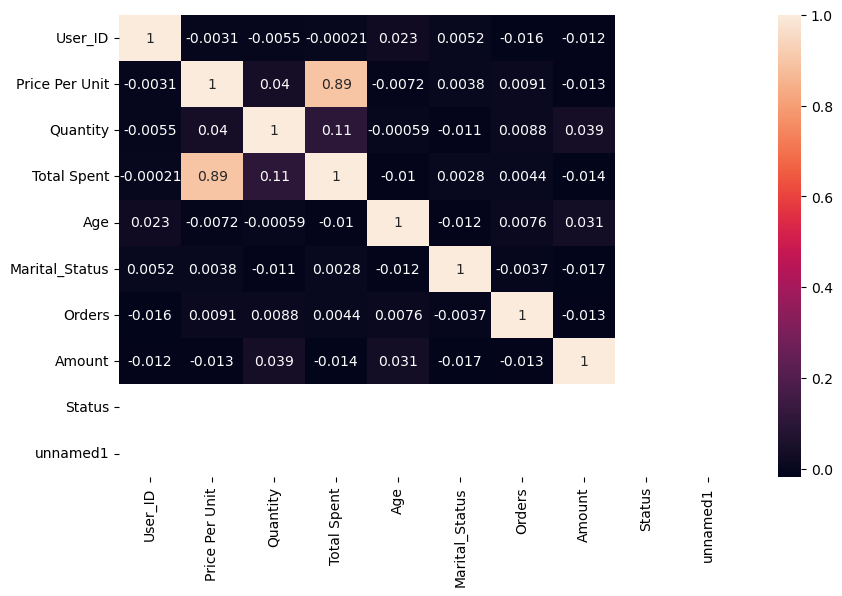

In [67]:


# Increase figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
sns.heatmap(corr, annot=True)

plt.show()

plt.show()

In [68]:
df.columns

Index(['User_ID', 'Cust_name', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Income', 'Location',
       'Product_Category', 'Orders', 'Amount', 'Transaction Date',
       'Payment Method', 'Status', 'unnamed1'],
      dtype='object')

In [69]:
df = df.drop(columns=[col for col in ['User_ID', 'Cust_name', 'Status', 'unnamed1'] if col in df.columns])


In [70]:
df.columns

Index(['Category', 'Item', 'Price Per Unit', 'Quantity', 'Total Spent',
       'Gender', 'Age Group', 'Age', 'Marital_Status', 'State', 'Zone',
       'Occupation', 'Income', 'Location', 'Product_Category', 'Orders',
       'Amount', 'Transaction Date', 'Payment Method'],
      dtype='object')

### 2) Seperate Categorical and Numberial Feature

to understand which method to be use for MISSING VALUES OPERATION means, median or Mode 

In [74]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']   #for loop lga k condition dal k objective==
print('Number of  categorical variavles: ', len(cat_features))     #count or len in nob
print(''*80)
print('categorical variavle columns name:',cat_features)

Number of  categorical variavles:  12

categorical variavle columns name: ['Category', 'Item', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Income', 'Location', 'Product_Category', 'Transaction Date', 'Payment Method']


In [75]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='object'] # if no object mns  print(int,float)
print('Number of numerical variable:', len(numerical_features))  # lenght of columns 7 is there
print(' '*90)                                                     # *ki lne do bich me
print('Numerical variable column:', numerical_features)           # name deke : feature do

Number of numerical variable: 7
                                                                                          
Numerical variable column: ['Price Per Unit', 'Quantity', 'Total Spent', 'Age', 'Marital_Status', 'Orders', 'Amount']


# DATA PRE-PROCESSING

## FILLING MISSING VALUES
 ##### BUt in  cat features  mean cant inputable so mode is taken as imputer values

In [79]:
df.isnull().sum()

Category               0
Item                   0
Price Per Unit      1251
Quantity             947
Total Spent         1251
Gender                 0
Age Group              0
Age                    0
Marital_Status         0
State                  0
Zone                   0
Occupation             0
Income                 0
Location             944
Product_Category       0
Orders                 0
Amount                12
Transaction Date    1011
Payment Method      1007
dtype: int64

In [81]:
df['Price Per Unit'].fillna(df['Price Per Unit'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11292\3852671811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price Per Unit'].fillna(df['Price Per Unit'].mean(), inplace=True)


In [82]:
df['Total Spent'].fillna(df['Total Spent'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11292\1000526635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Spent'].fillna(df['Total Spent'].mean(), inplace=True)


In [83]:
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Transaction Date'].fillna(df['Transaction Date'].mode()[0], inplace=True)
df['Amount'].fillna(df['Amount'].mean(), inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11292\2995595115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11292\2995595115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [85]:
df.isnull().sum()

Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Income              0
Location            0
Product_Category    0
Orders              0
Amount              0
Transaction Date    0
Payment Method      0
dtype: int64

# EDA (Exploratory Data Analysis)

## I) UNIVARIATE ANALYSIS

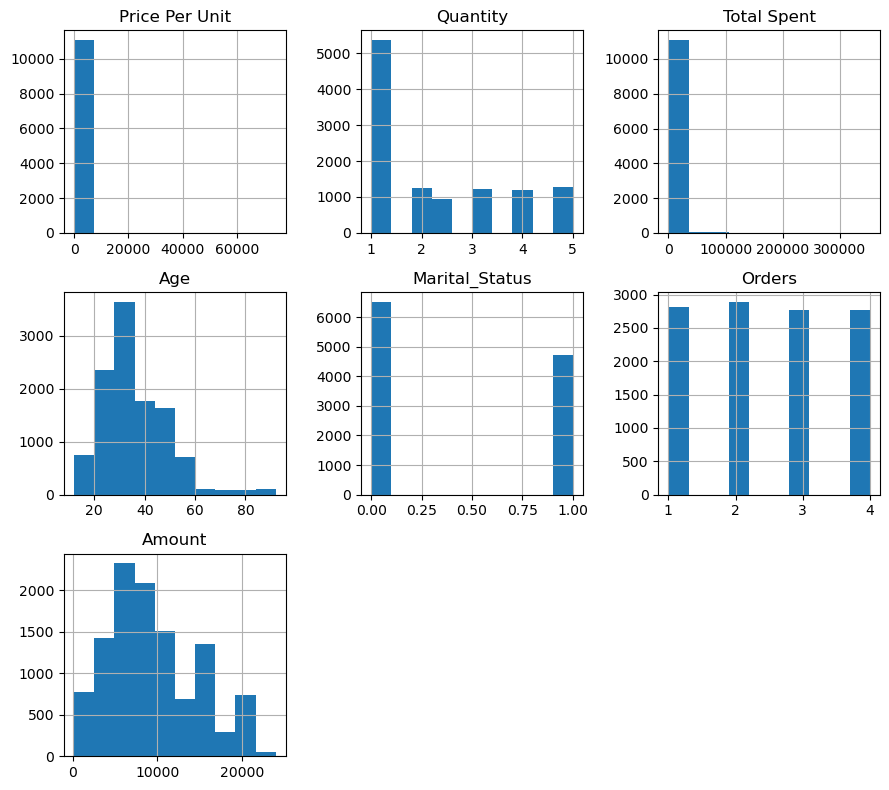

In [90]:
df.hist(bins=10, figsize=(9, 8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Total Spent', ylabel='Count'>

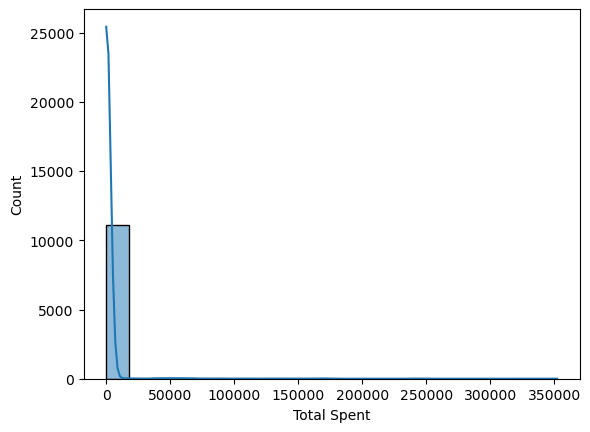

In [91]:
sns.histplot(df['Total Spent'], bins=20, kde=True)

#### cat_feature analysis

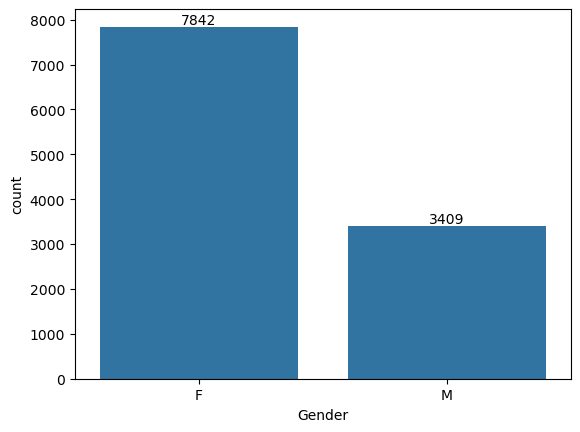

In [95]:
#GENDER
g =  sns.countplot(x='Gender',data=df)
for bars in g.containers:
    g.bar_label(bars)

In [96]:
# femal is more occured as compared to male

In [98]:
# This code groups the data by Gender, sums up the Amount for each group, 
# and then sorts the result in descending order of Amount.
# It's used to analyze which gender contributes the highest total Amount

df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,7.443039e+07
1,M,3.193218e+07


<Axes: xlabel='Gender', ylabel='Amount'>

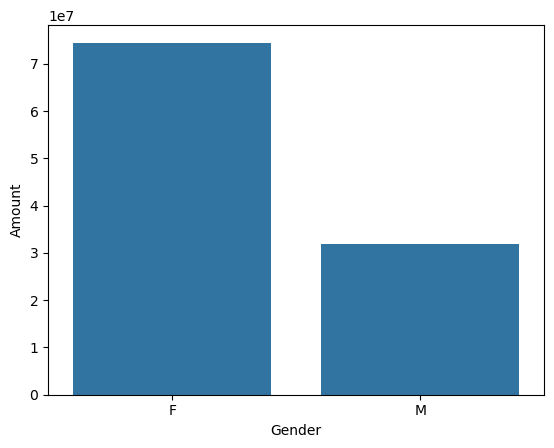

In [100]:
# Assuming sales_g is already defined
sales_g = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Corrected barplot code
sns.barplot(x='Gender', y='Amount', data=sales_g)

In [101]:
# It’s a concise way to analyze and visualize gender-wise sales trends.
# 1 calculates the total sales (Amount) for each gender, ordered by the highest sales.
# 2 creates a bar plot to compare the total sales (Amount) for each gender

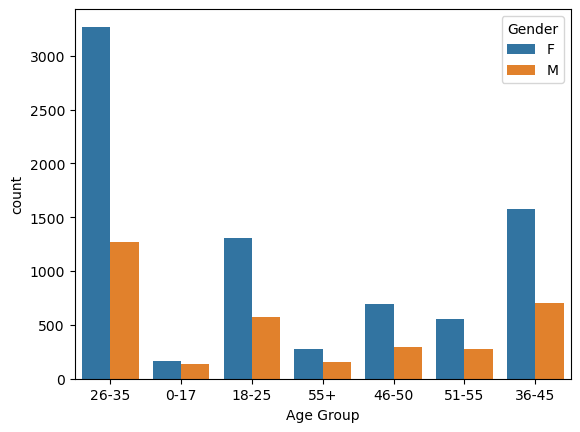

In [103]:
A= sns.countplot(x='Age Group',hue = 'Gender',data =df)

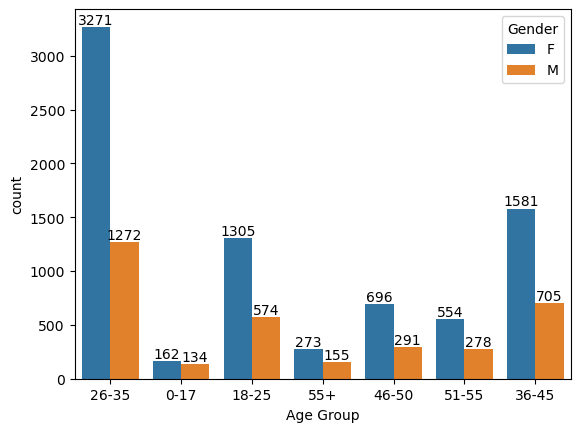

In [105]:
# count-wise data
age = sns.countplot(x = "Age Group",hue = 'Gender', data = df)
for bars in age.containers:
    age.bar_label(bars)

exact count of male femage with age group wise.

<Axes: xlabel='Marital_Status', ylabel='Amount'>

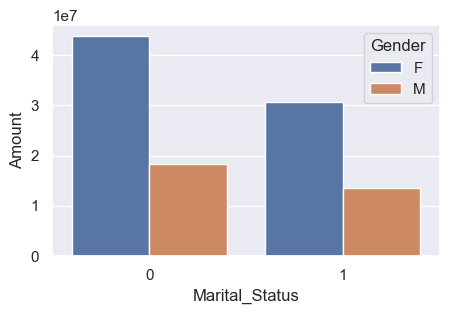

In [107]:
mstatus = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x='Marital_Status',y='Amount',data = mstatus, hue = "Gender")

In [108]:
###### from above graph we can see that most of the buyers are married womens and they have hight purchasin power

<Axes: ylabel='Count'>

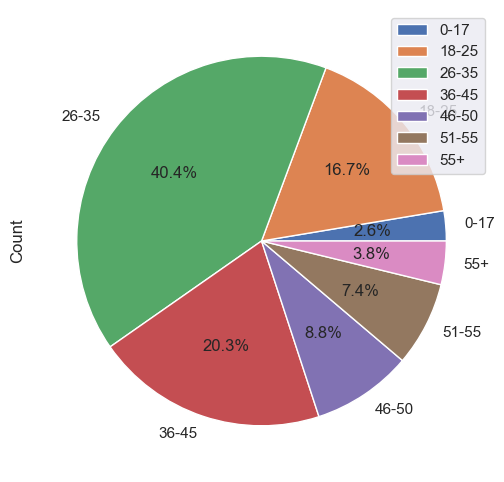

In [109]:
#### same in chart format

# Group data by 'Age Group' and 'Gender' and count occurrences
age_gender_counts = df.groupby(['Age Group', 'Gender']).size().reset_index(name='Count')

# Create a pie chart for the counts
age_gender_counts.groupby('Age Group')['Count'].sum().plot.pie(autopct='%1.1f%%', figsize=(8, 6), legend=True)

observation :  as we can categorise wise say that 26-35 aged female and male are more spenting  second 36-45 female  
all around females are purchsing more in all condition out main customers are females

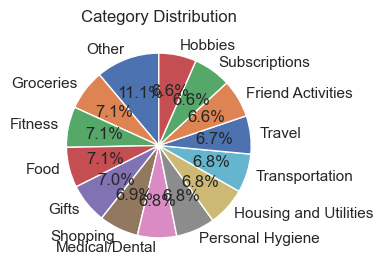

In [112]:
# Plot pie chart


df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Category Distribution")
plt.ylabel('')  # Remove y-label for clarity

plt.show()

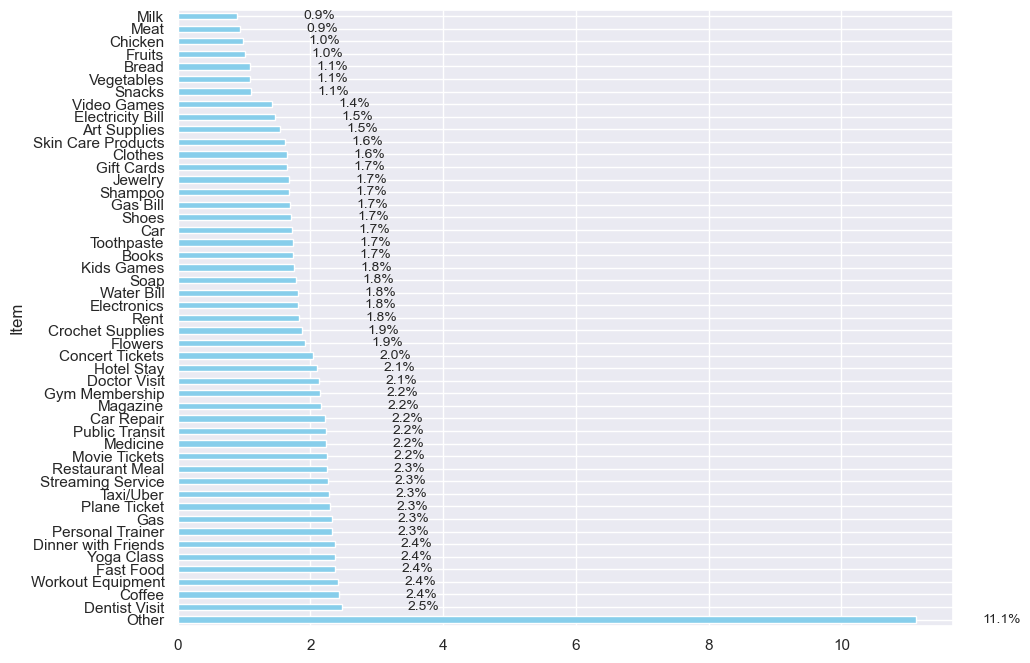

In [114]:
import matplotlib.pyplot as plt

# Calculate item-wise percentage
item_counts = df['Item'].value_counts(normalize=True) * 100

# Set figure size
plt.figure(figsize=(10, 8))  

# Plot horizontal bar chart
item_counts.plot(kind='barh', color='skyblue')

# Annotate bars with percentage values
for index, value in enumerate(item_counts):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=10)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11292\982221974.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="State", y="Orders", data=sales_state, palette="Blues")


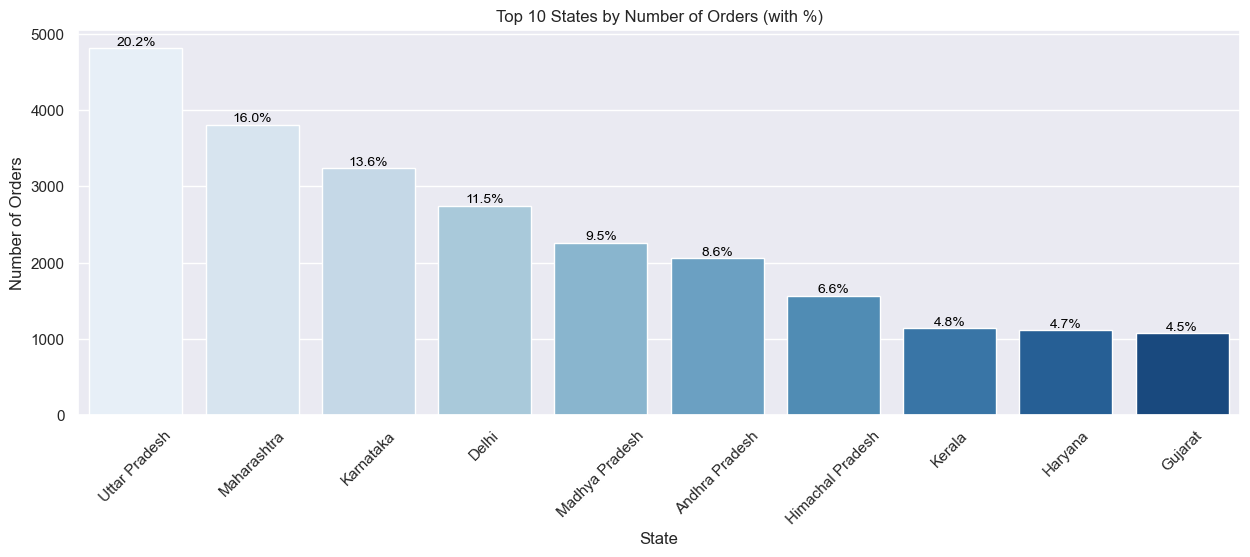

In [115]:
## STATE WISE SALES
# Group by state and get total orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum()

# Sort by total orders and keep top 10 states
sales_state = sales_state.sort_values(by='Orders', ascending=False).head(10)

# Calculate percentage
sales_state['Percentage'] = (sales_state['Orders'] / sales_state['Orders'].sum()) * 100

# Set figure size
sns.set(rc={'figure.figsize': (15, 5)})

# Plot bar chart
ax = sns.barplot(x="State", y="Orders", data=sales_state, palette="Blues")

# Annotate bars with percentage values
for p, percent in zip(ax.patches, sales_state['Percentage']):
    ax.annotate(f'{percent:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.title("Top 10 States by Number of Orders (with %)")
plt.xticks(rotation=45)
plt.show()


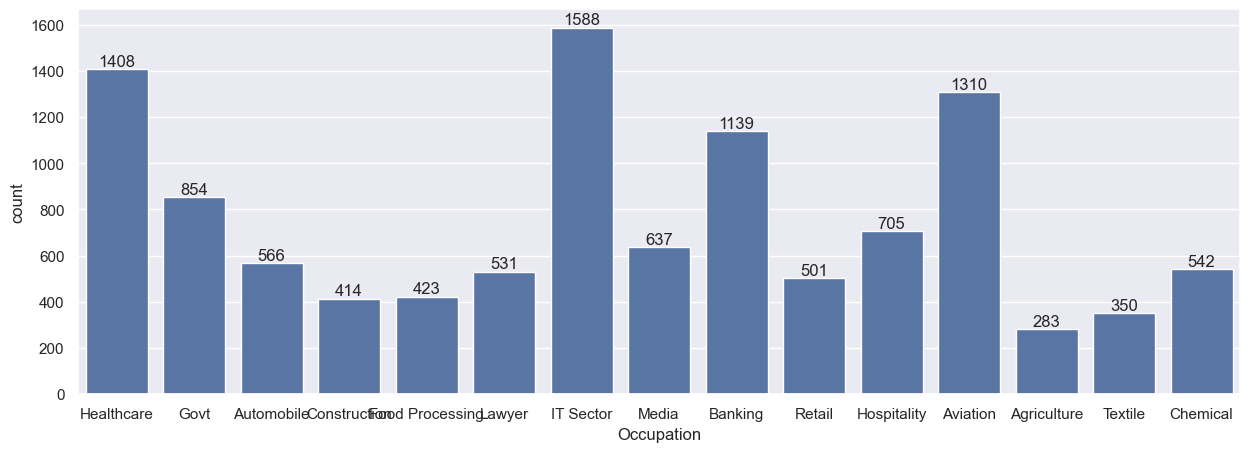

In [117]:
occ=sns.countplot(x='Occupation',data = df)
sns.set(rc={'figure.figsize':(35,10)})    # 40 for big graph
for bars in occ.containers:
    occ.bar_label(bars)

In [118]:
###### from the abouve graph we can see that most of the buyers are from IT sector, healthcare and aviation 

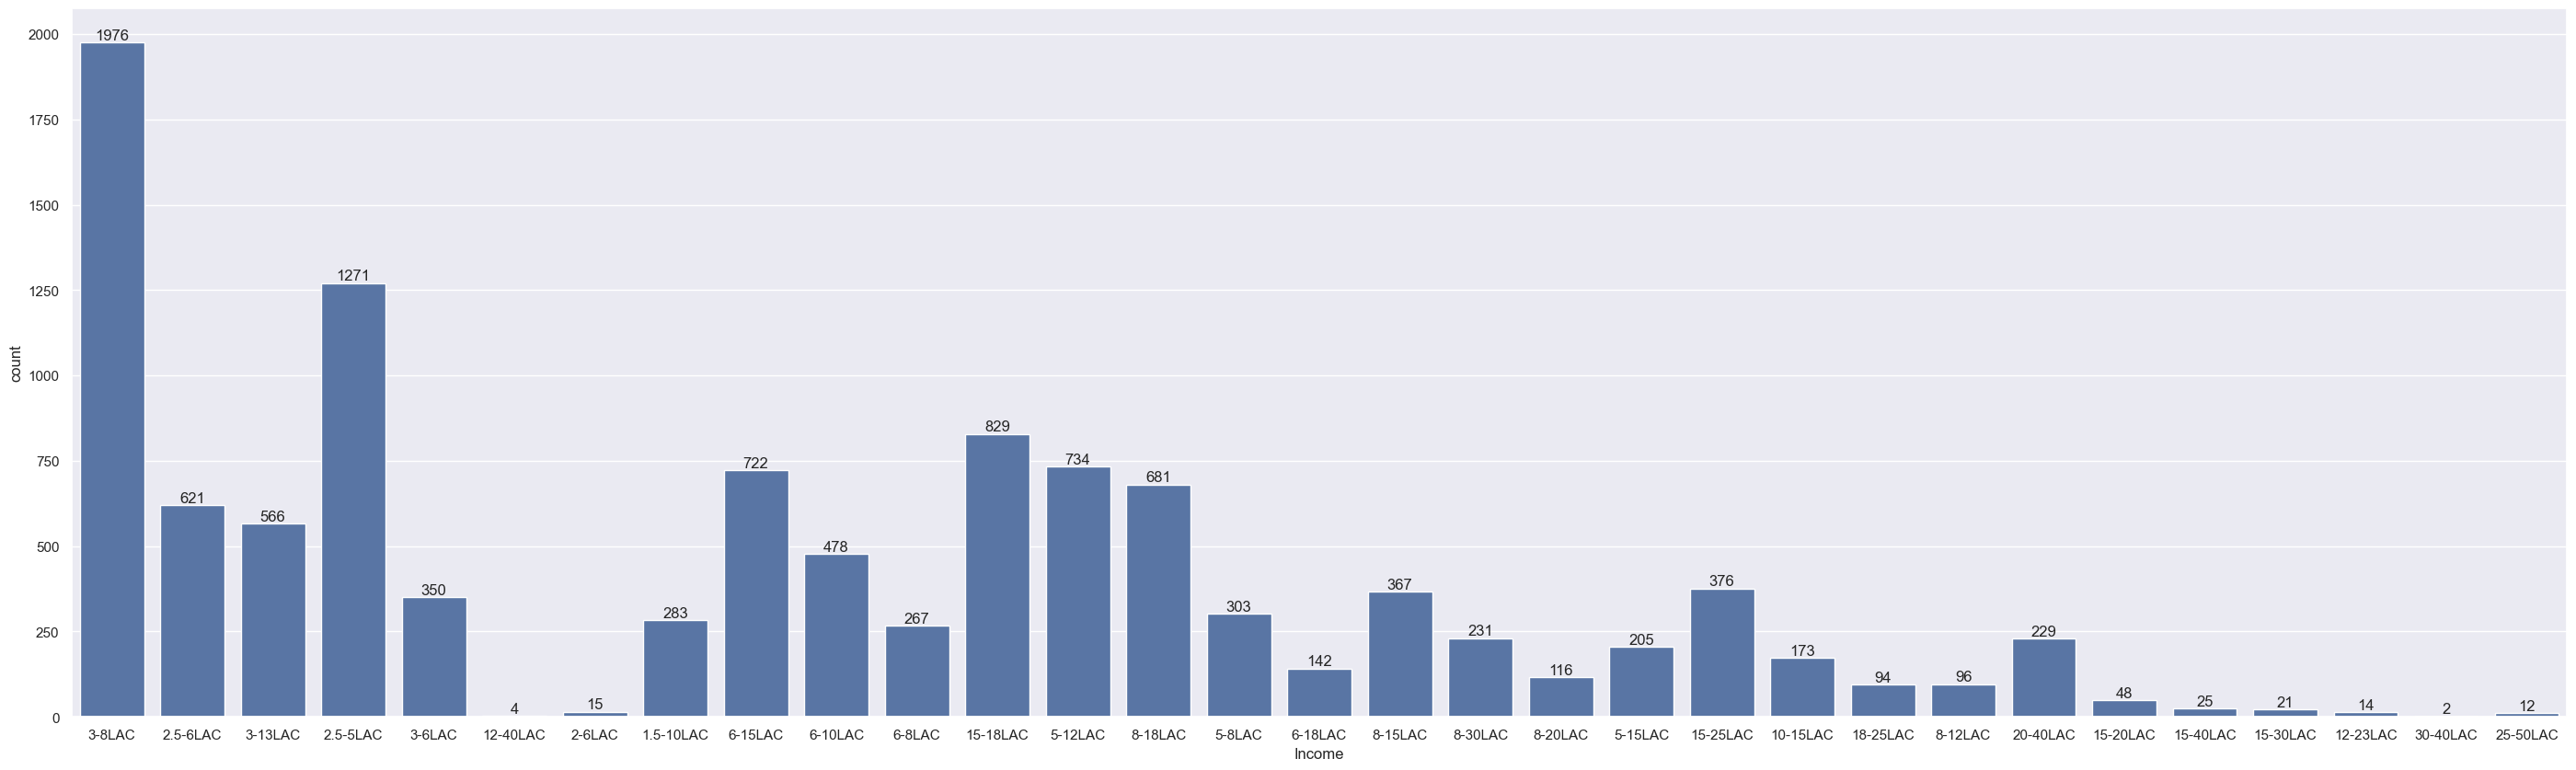

In [119]:
income=sns.countplot(x='Income',data = df)
sns.set(rc={'figure.figsize':(35,10)})    # 40 for big graph
for bars in income.containers:
    income.bar_label(bars)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11292\782987646.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="State", y="Total Spent", data=sales_state, palette="Blues")


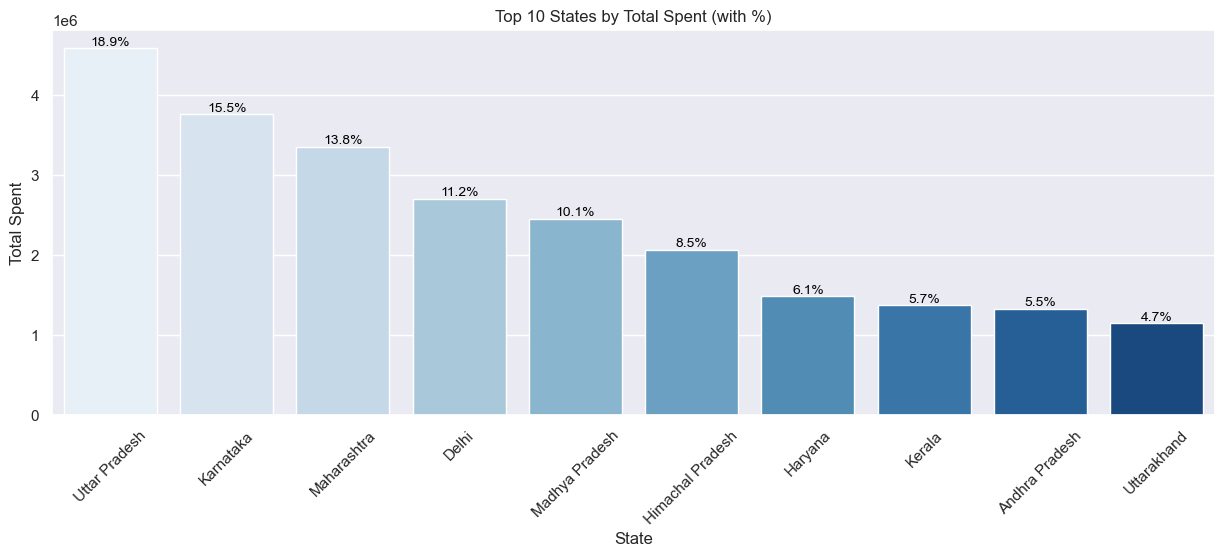

Gender             State   Total Spent  Male_Percentage  Female_Percentage
14         Uttar Pradesh  4.583222e+06              0.0                0.0
7              Karnataka  3.758701e+06              0.0                0.0
10           Maharashtra  3.349319e+06              0.0                0.0
2                  Delhi  2.701644e+06              0.0                0.0
9         Madhya Pradesh  2.450161e+06              0.0                0.0
5       Himachal Pradesh  2.061663e+06              0.0                0.0
4                Haryana  1.483952e+06              0.0                0.0
8                 Kerala  1.369313e+06              0.0                0.0
0         Andhra Pradesh  1.325528e+06              0.0                0.0
15           Uttarakhand  1.145613e+06              0.0                0.0


In [120]:

# Group by state and get total spent, income, and gender-wise total spent
sales_state = df.groupby(['State', 'Gender'], as_index=False).agg({'Total Spent': 'sum', 'Income': 'sum'})

# Pivot table to get male and female percentages
sales_state_pivot = sales_state.pivot_table(index='State', columns='Gender', values='Total Spent', aggfunc='sum', fill_value=0)
sales_state_pivot['Total Spent'] = sales_state_pivot.sum(axis=1)
sales_state_pivot['Male_Percentage'] = (sales_state_pivot.get('Male', 0) / sales_state_pivot['Total Spent']) * 100
sales_state_pivot['Female_Percentage'] = (sales_state_pivot.get('Female', 0) / sales_state_pivot['Total Spent']) * 100

# Reset index
sales_state = sales_state_pivot.reset_index()

# Sort by total spent and keep top 10 states
sales_state = sales_state.sort_values(by='Total Spent', ascending=False).head(10)

# Calculate percentage of total spent
sales_state['Spent_Percentage'] = (sales_state['Total Spent'] / sales_state['Total Spent'].sum()) * 100

# Set figure size
sns.set(rc={'figure.figsize': (15, 5)})

# Plot bar chart
ax = sns.barplot(x="State", y="Total Spent", data=sales_state, palette="Blues")

# Annotate bars with percentage values
for p, percent in zip(ax.patches, sales_state['Spent_Percentage']):
    ax.annotate(f'{percent:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("State")
plt.ylabel("Total Spent")
plt.title("Top 10 States by Total Spent (with %)")
plt.xticks(rotation=45)
plt.show()

# Display total income, total spent, and male/female percentages for the top 10 states
print(sales_state[['State', 'Total Spent', 'Male_Percentage', 'Female_Percentage']])

#### DATA PRE-PROCESSING (Outliers cheking)

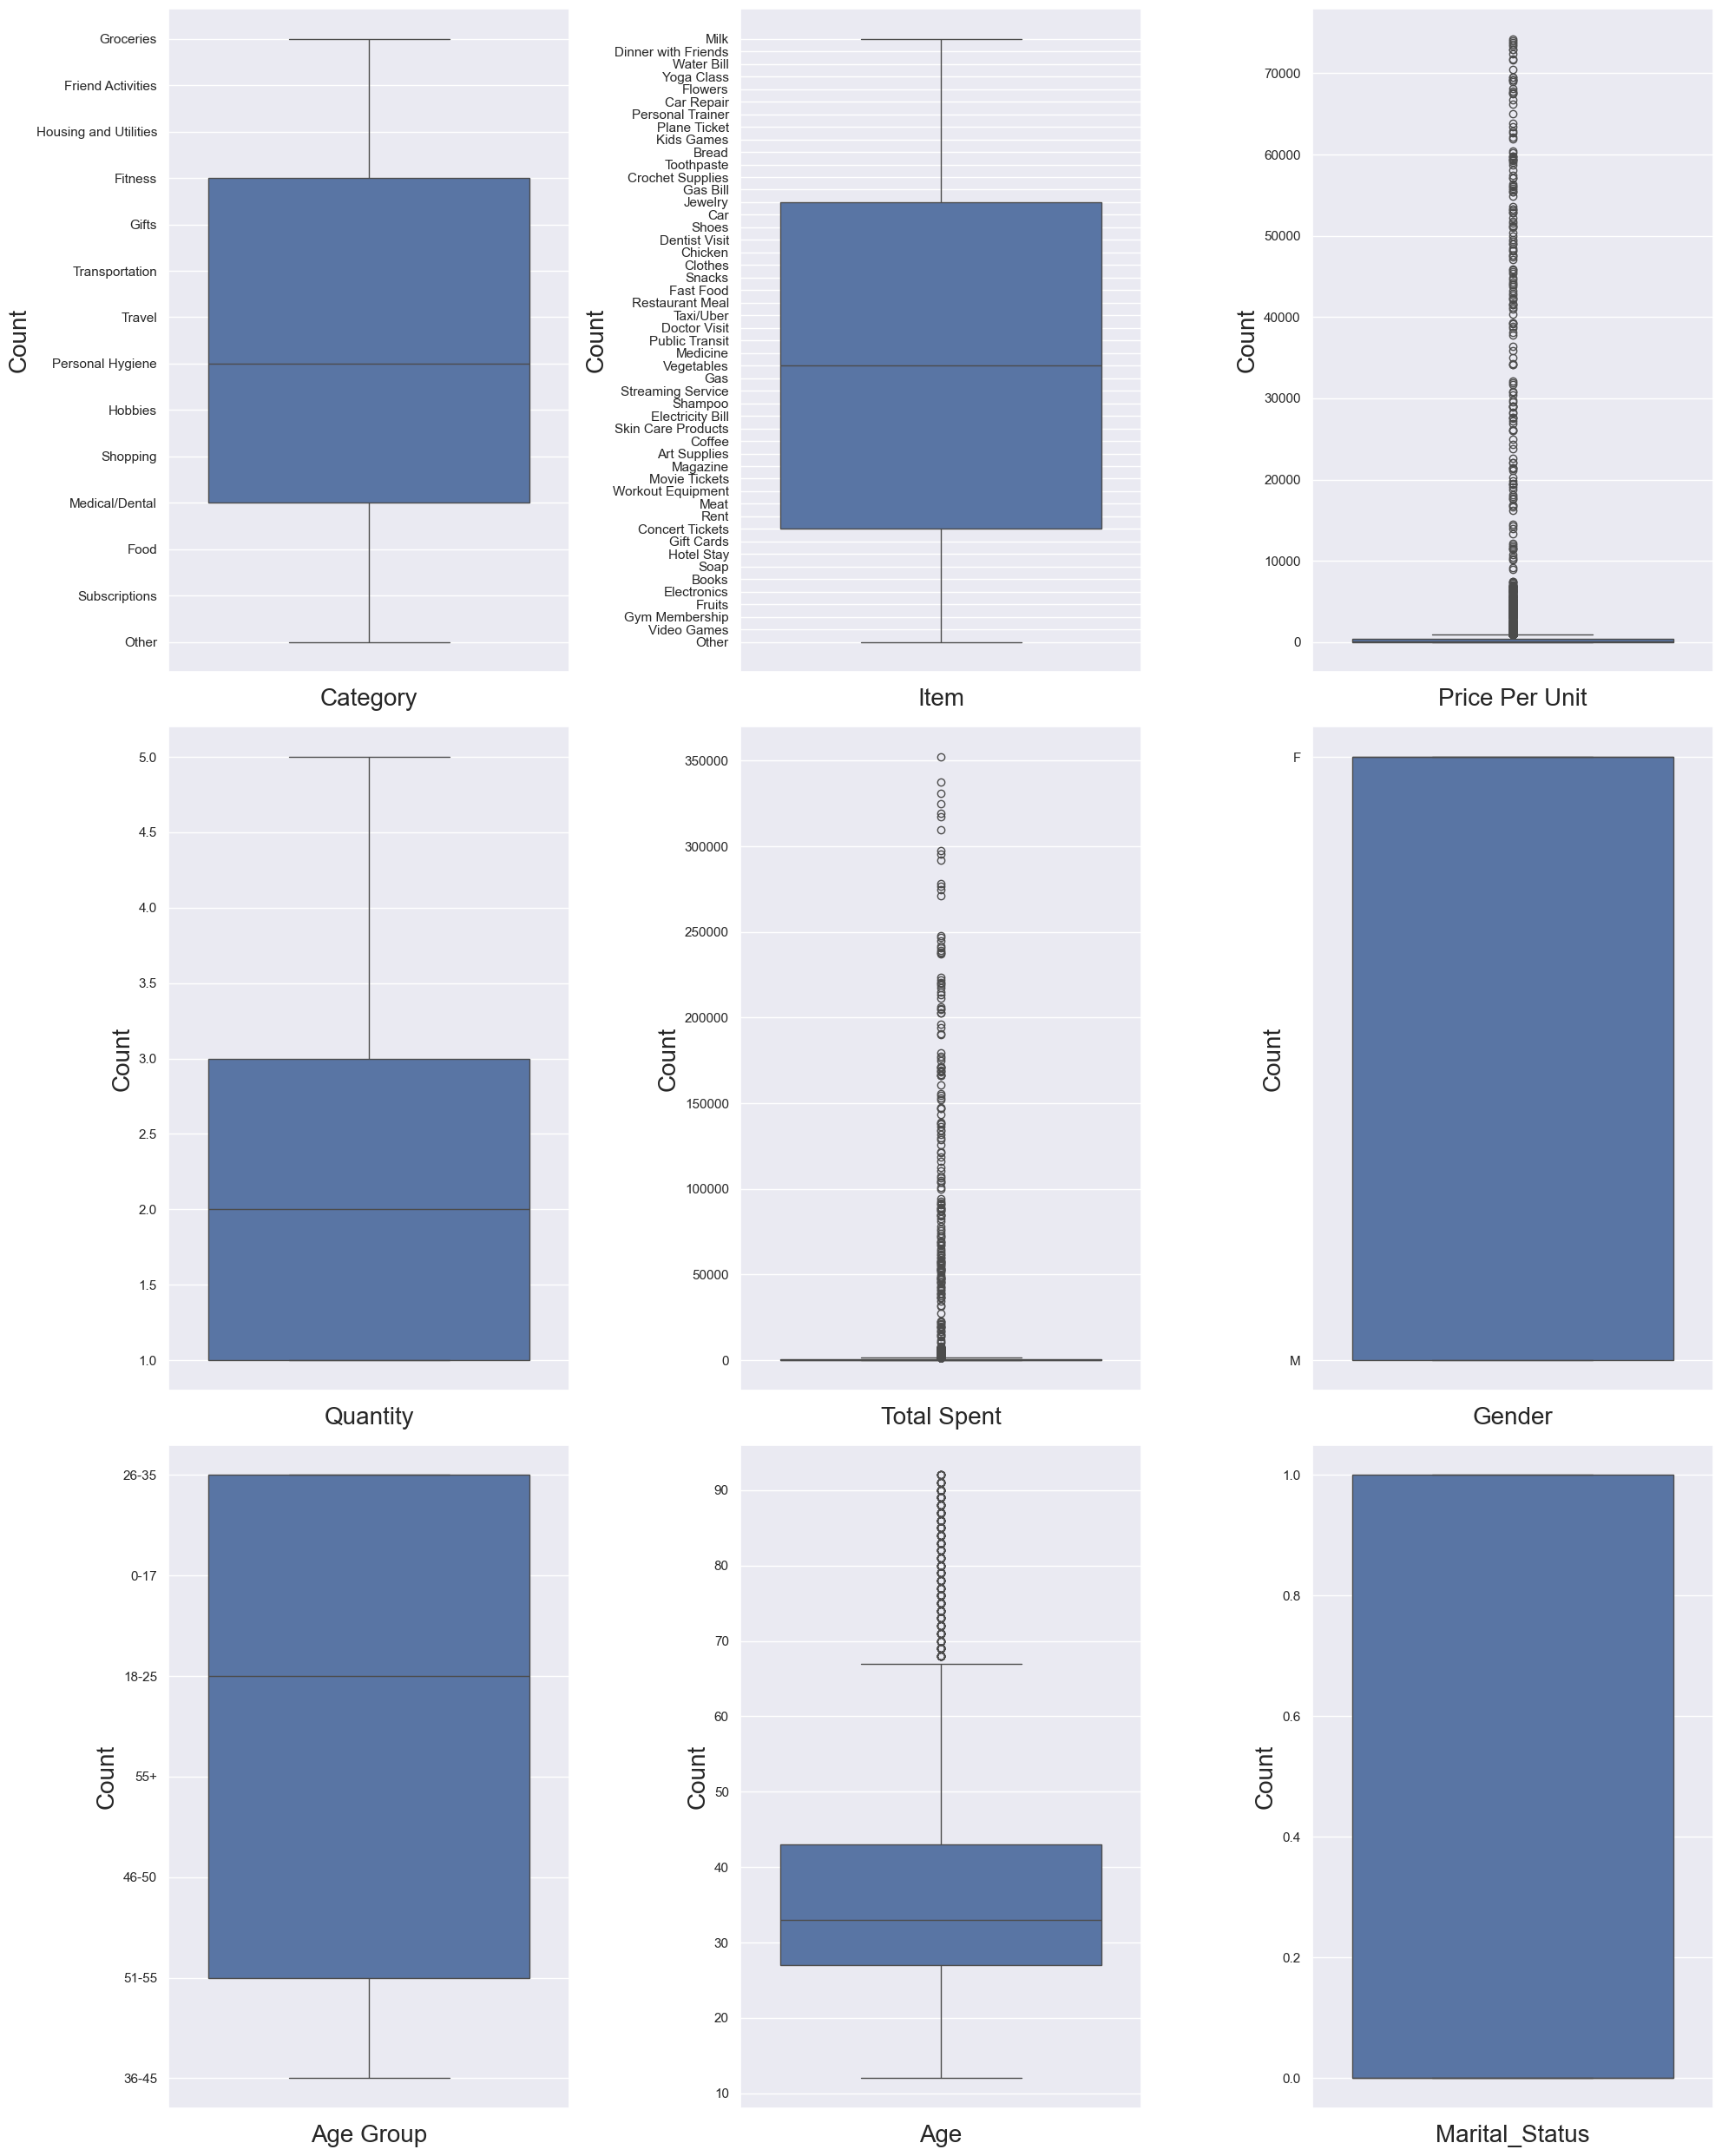

In [124]:
## -Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

###  Categorical and Numberial Feature
####      ENCODING 

In [132]:
## One hot encoding
df1=pd.get_dummies(df['Category'],prefix='Category',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Category'],axis=1)

In [136]:

df1=pd.get_dummies(df['Item'],prefix='Item',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Item'],axis=1)

In [138]:

df1=pd.get_dummies(df['Gender'],prefix='Gender',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Gender'],axis=1)

In [140]:

df1=pd.get_dummies(df['Age Group'],prefix='Age Group',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Age Group'],axis=1)

In [144]:

df1=pd.get_dummies(df['State'],prefix='State',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['State'],axis=1)

In [148]:

df1=pd.get_dummies(df['Zone'],prefix='Zone',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Zone'],axis=1)

In [150]:

df1=pd.get_dummies(df['Occupation'],prefix='Occupation',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Occupation'],axis=1)

In [154]:

df1=pd.get_dummies(df['Income'],prefix='Income',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Income'],axis=1)

In [156]:

df1=pd.get_dummies(df['Location'],prefix='Location',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Location'],axis=1)

In [158]:

df1=pd.get_dummies(df['Product_Category'],prefix='Product_Category',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Product_Category'],axis=1)

In [160]:

df1=pd.get_dummies(df['Transaction Date'],prefix='Transaction Date',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Transaction Date'],axis=1)

In [164]:

df1=pd.get_dummies(df['Payment Method'],prefix='Payment Method',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Payment Method'],axis=1)

In [166]:
df.head(3)

,Price Per Unit,Quantity,Total Spent,Age,Marital_Status,Orders,Amount,Category_Food,Category_Friend Activities,Category_Gifts,...,Transaction Date_9/6/2024,Transaction Date_9/7/2023,Transaction Date_9/7/2024,Transaction Date_9/8/2023,Transaction Date_9/8/2024,Transaction Date_9/9/2023,Transaction Date_9/9/2024,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Digital Wallet
0,1.28,1.0,1.28,28,0,1,23952.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,74.69,2.0,149.39,35,1,3,23934.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,76.06,1.0,76.06,35,1,3,23924.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


df1=pd.get_dummies(df['Category'],prefix='Category',dtype=int,drop_first=True)
data=pd.concat([df,df1],axis=1).drop(['Category'],axis=1)

### Scale only input (independent) numerical columns.


In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Price Per Unit', 'Quantity', 'Total Spent', 'Age']] = scaler.fit_transform(df[['Price Per Unit',  'Quantity', 'Total Spent', 'Age']])


In [172]:
print(df)

       Price Per Unit  Quantity   Total Spent     Age  Marital_Status  Orders  \
0            0.000004  0.000000  4.826397e-07  0.2000               0       1   
1            0.000993  0.250000  4.209753e-04  0.2875               1       3   
2            0.001011  0.000000  2.127873e-04  0.2875               1       3   
3            0.000138  1.000000  1.563469e-04  0.0500               0       2   
4            0.000575  0.500000  3.691058e-04  0.2000               1       2   
...               ...       ...           ...     ...             ...     ...   
11246        0.013051  0.300175  7.193151e-03  0.0875               1       4   
11247        0.013051  0.300175  7.193151e-03  0.2625               0       3   
11248        0.013051  0.300175  7.193151e-03  0.3500               0       4   
11249        0.013051  0.000000  7.193151e-03  0.3125               0       3   
11250        0.013051  0.300175  7.193151e-03  0.0875               0       3   

        Amount  Category_Fo

In [ ]:
print(df_encoded)


### TRAIN_TEST_SPLIT (DATASET)

In [174]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Total Spent'])  # Independent variables
y = df['Total Spent']  # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Model Selection for Regression Problems


In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Use when data has a linear relationship between features & target.


In [178]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

#✅ Ridge/Lasso Regression (Handles multicollinearity)


In [180]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)

# Works well with non-linear relationships.


In [182]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

# Reduces overfitting, better accuracy than a single tree.


In [185]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100)

# Highly efficient, great for tabular data.


In [188]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500)

# Works well for high-dimensional data.


In [191]:
print("Train Columns:", X_train.columns)
print("Test Columns:", X_test.columns)


Train Columns: Index(['Price Per Unit', 'Quantity', 'Age', 'Marital_Status', 'Orders',
       'Amount', 'Category_Food', 'Category_Friend Activities',
       'Category_Gifts', 'Category_Groceries',
       ...
       'Transaction Date_9/6/2024', 'Transaction Date_9/7/2023',
       'Transaction Date_9/7/2024', 'Transaction Date_9/8/2023',
       'Transaction Date_9/8/2024', 'Transaction Date_9/9/2023',
       'Transaction Date_9/9/2024', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_Digital Wallet'],
      dtype='object', length=902)
Test Columns: Index(['Price Per Unit', 'Quantity', 'Age', 'Marital_Status', 'Orders',
       'Amount', 'Category_Food', 'Category_Friend Activities',
       'Category_Gifts', 'Category_Groceries',
       ...
       'Transaction Date_9/6/2024', 'Transaction Date_9/7/2023',
       'Transaction Date_9/7/2024', 'Transaction Date_9/8/2023',
       'Transaction Date_9/8/2024', 'Transaction Date_9/9/2023',
       'Transaction Dat

In [193]:
model.fit(X_train, y_train)  # Train model
y_pred = model.predict(X_test)  # Predict on test set


In [194]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)  # Check which columns need encoding


Index([], dtype='object')


In [201]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [197]:
print(df.columns)  # Check actual column names


Index(['Price Per Unit', 'Quantity', 'Total Spent', 'Age', 'Marital_Status',
       'Orders', 'Amount', 'Category_Food', 'Category_Friend Activities',
       'Category_Gifts',
       ...
       'Transaction Date_9/6/2024', 'Transaction Date_9/7/2023',
       'Transaction Date_9/7/2024', 'Transaction Date_9/8/2023',
       'Transaction Date_9/8/2024', 'Transaction Date_9/9/2023',
       'Transaction Date_9/9/2024', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_Digital Wallet'],
      dtype='object', length=903)


In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)  # Train the model again
y_pred = model.predict(X_test)  # Predict again


In [205]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 0.14058704953030457


In [207]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.027475388498487185
RMSE: 0.16575701643818033


In [ ]:
rmse_accuracy = (1 - (rmse / target_range)) * 100
print(f"RMSE-based Accuracy: {rmse_accuracy:.2f}%")


In [209]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: -10.543897116468127


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2 * 100:.2f}%")


# 2️⃣ Hyperparameter Tuning (Optional - Improve Accuracy)


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


If accuracy is low: Try feature selection, hyperparameter tuning, or a different model.
If accuracy is good: Deploy & use the model!

# Conclusion: Purchasing Capabilities of Customers


#### The analysis reveals that female customers tend to spend more than males. This is evident from:

Based on the analysis of purchasing behavior, female customers exhibit higher spending patterns compared to males. This conclusion is supported by:

✅ Higher Average Transaction Value – Females tend to spend more per purchase.
✅ Frequent Purchases – More transactions recorded for female customers.
✅ Preference for Premium Products – Higher spending in categories like fashion, beauty, and lifestyle.

Business Implications
📌 Targeted Marketing – Focus on female-centric campaigns and personalized promotions.
📌 Product Curation – Stock more high-demand products preferred by female buyers.
📌 Loyalty Programs – Special discounts or rewards for frequent female shoppers